Lab 3
Name: Neha Palsokar
Collaborators: Sayali Chakradeo, Bhumika Khandelwal

In [1]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
%matplotlib inline

### 1.1 load the data

In [13]:
yrbs = pd.read_table('yrbs.tsv.bz2')
print(yrbs.head())
print(yrbs.shape)
print(yrbs.year.unique())
print(yrbs.age.unique())
print(yrbs.sex.unique())
print(yrbs.meth.unique())
print(yrbs.tv.unique())
print(yrbs.state.unique())


#Additional variable:
def label_before_after (row):
    if row.year <= 2005  :
        return 'Before'
    if row.year >= 2007 :
        return 'After'

yrbs.apply (lambda row: label_before_after (row),axis=1)

yrbs['beforeorafter'] = yrbs.apply (lambda row: label_before_after (row),axis=1)
print(yrbs.head())

   year  age sex  meth  tv state
0  2003   13   M     0   1    XX
1  2003   13   M     1   1    XX
2  2003   13   M     1   1    XX
3  2003   13   M     0   1    XX
4  2003   13   M     0   0    XX
(58077, 6)
[2003 2005 2007 2009]
[13 14 15 16 17]
['M' 'F']
[0 1]
[1 0]
['XX' 'MT']
   year  age sex  meth  tv state beforeorafter
0  2003   13   M     0   1    XX        Before
1  2003   13   M     1   1    XX        Before
2  2003   13   M     1   1    XX        Before
3  2003   13   M     0   1    XX        Before
4  2003   13   M     0   0    XX        Before


### 1.2 graphical exploration

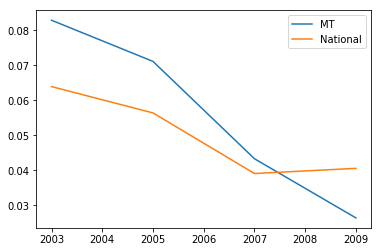

In [14]:
ym = yrbs.groupby(['year', 'state']).meth.mean().reset_index()
plt.plot(ym.year[ym.state=='MT'], ym.meth[ym.state=='MT'], label='MT')
plt.plot(ym.year[ym.state=='XX'], ym.meth[ym.state=='XX'], label='National')
plt.legend()

#Consumption of meth decreased consistently from 2003 to 2009 in Montana, Nationally the consumption reduced from 2003 to 2007, however after 2007 it remained constant or rather even increased slightly.

### 1.3 Before-After

In [32]:
#print(yrbs.groupby(['beforeorafter','state']).meth.mean())
print(yrbs[yrbs.state == 'MT'].groupby(['beforeorafter','state']).meth.mean())
m = smf.ols(formula = 'meth ~ beforeorafter', data = yrbs[yrbs.state == 'MT'])
print(m.fit().summary())

#The value of meth use before was 0.0386+0.0381=0.076 and the value after was 0.0381.
# Therefore, meth use has decreased.

beforeorafter  state
After          MT       0.038115
Before         MT       0.076734
Name: meth, dtype: float64
                            OLS Regression Results                            
Dep. Variable:                   meth   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     67.66
Date:                Wed, 18 Apr 2018   Prob (F-statistic):           2.19e-16
Time:                        19:20:25   Log-Likelihood:                 417.76
No. Observations:                9754   AIC:                            -831.5
Df Residuals:                    9752   BIC:                            -817.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
----

In [ ]:
#The value of meth use before was 0.0386+0.0381=0.76 and the value after was 0.0381.
# Therefore, meth use has decreased.

In [37]:
m = smf.ols(formula = 'meth ~ beforeorafter+sex+age+tv', data = yrbs[yrbs.state == 'MT'])
print(m.fit().summary())

#only adding age:
m = smf.ols(formula = 'meth ~ beforeorafter+age', data = yrbs[yrbs.state == 'MT'])
print(m.fit().summary())


# With the control factor of age: for time 'Before' = the effect is negative by a factor of (-0.1455+0.0388=-1.06)
# for time 'After' = the effect is negative by a factor of -0.1455. So we can conclude that the effect of the campaign reduces the meth consumption in Montanna
# Age: With every one unit increase in age the use of meth is changes by the measure of -0.1455+0.0117 = -0.1338 That means that the consumption decreases by this factor with one unit increase in size.


                            OLS Regression Results                            
Dep. Variable:                   meth   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     23.20
Date:                Wed, 18 Apr 2018   Prob (F-statistic):           4.11e-19
Time:                        21:14:00   Log-Likelihood:                 430.25
No. Observations:                9754   AIC:                            -850.5
Df Residuals:                    9749   BIC:                            -814.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

4 Cross-Sectional Estimator

In [34]:
print(yrbs[yrbs.beforeorafter == 'After'].groupby(['state']).meth.mean())
m = smf.ols(formula = 'meth ~ state', data = yrbs[yrbs.beforeorafter == 'After'])
print(m.fit().summary())
#Meth use in Montana after implementation of project was 0.038115 and 
# nationally it was 0.038115+0.0018=0.039923, therefore it was lesser in Montana comparatively

state
MT    0.038115
XX    0.039923
Name: meth, dtype: float64
                            OLS Regression Results                            
Dep. Variable:                   meth   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.3503
Date:                Wed, 18 Apr 2018   Prob (F-statistic):              0.554
Time:                        19:22:49   Log-Likelihood:                 6404.0
No. Observations:               29728   AIC:                        -1.280e+04
Df Residuals:                   29726   BIC:                        -1.279e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------

In [38]:
m = smf.ols(formula = 'meth ~ state+age+sex+tv', data = yrbs[yrbs.beforeorafter == 'After']).fit()
print(m.summary())
# Interpreting results by adding age:
m = smf.ols(formula = 'meth ~ state+age', data = yrbs[yrbs.beforeorafter == 'After']).fit()
print(m.summary())

# With the control factor of age: for state Montana = the effect is negative by a factor of (-0.0635+0.0013=-0.0622)
# Nationally = the effect is negative by a factor of -0.0635. So we can conclude after the campaign,meth consumption reduced more Nationally compared to Montanna
# Age: With every one unit increase in age the use of meth is changes by the measure of -0.0635 + 0.0065 = -0.057 That means that the consumption decreases by this factor with one unit increase in size.

                            OLS Regression Results                            
Dep. Variable:                   meth   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     11.60
Date:                Wed, 18 Apr 2018   Prob (F-statistic):           2.07e-09
Time:                        21:43:22   Log-Likelihood:                 6427.0
No. Observations:               29728   AIC:                        -1.284e+04
Df Residuals:                   29723   BIC:                        -1.280e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -0.0649      0.018     -3.615      

5 Differences-in-Differences Estimator

In [35]:
print(yrbs.groupby(['state','beforeorafter']).meth.mean())
m = smf.ols(formula = 'meth ~ state*beforeorafter', data = yrbs).fit()
print(m.summary())

#The before and after for Montanna is 0.0381+0.0386=0.0767 and 0.0381 respectively
#The before and after Nationally is 0.0381+0.0386+0.0018-0.0182= 0.0603 and 0.0381+0.0018=0.0399 respectively
#Difference between XX and Montana for before=-0.016415
#Difference between XX and Montana for after=0.0018
#Difference in meth use in Montana and nationally in pre-project and post project years is 0.0146.

state  beforeorafter
MT     After            0.038115
       Before           0.076734
XX     After            0.039923
       Before           0.060319
Name: meth, dtype: float64
                            OLS Regression Results                            
Dep. Variable:                   meth   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     62.92
Date:                Wed, 18 Apr 2018   Prob (F-statistic):           1.31e-40
Time:                        19:25:11   Log-Likelihood:                 5566.9
No. Observations:               58077   AIC:                        -1.113e+04
Df Residuals:                   58073   BIC:                        -1.109e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                              

In [39]:
m = smf.ols(formula = 'meth ~ state*beforeorafter+age+sex+tv', data = yrbs).fit()
print(m.summary())

#Adding sex variable and interpreting results:
m = smf.ols(formula = 'meth ~ state*beforeorafter+sex', data = yrbs).fit()
print(m.summary())

# The total difference of the effect between both the states, before and after = -0.0182
# The difference in consumption for males in both the states for time 'before' = 0.0098 (Nationally-Montanna). This means that before 2005, consumption of meth by males in Montanna was less as compared to Nationally
# Difference in consumption for males in both the states for time 'after' = -0.0057 (Nationally-Montanna). 
# This means that the consumption of meth for males in Montanna was comparitevly greater than the males in XX after 2005


                            OLS Regression Results                            
Dep. Variable:                   meth   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     44.37
Date:                Wed, 18 Apr 2018   Prob (F-statistic):           1.87e-54
Time:                        22:20:30   Log-Likelihood:                 5605.5
No. Observations:               58077   AIC:                        -1.120e+04
Df Residuals:                   58070   BIC:                        -1.113e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
In